# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [23]:
# Get the empty lists to store the values of each
country = []
city_list = []
date = []
max_temperature = []
cloudiness = []
humidity = []
latitude = []
longitude = []
wind_speed = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
print("Beginning Data Retrieval")
print("-----------------------------")

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Create a loop for all cities
i = 1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q" + city
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='
                                   f'{city}&units=imperial').json()
    
    try:
        country.append(response["sys"]["country"])
        city_list.append(response["name"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record : {i}|{city}") 
        i+=1
  
    except(KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record : 1|mildura
Processing Record : 2|lewistown
Processing Record : 3|tuktoyaktuk
Processing Record : 4|guanica
Processing Record : 5|tromso
Processing Record : 6|colares
Processing Record : 7|hobart
Processing Record : 8|casa nova
Processing Record : 9|dikson
City not found. Skipping...
Processing Record : 10|asau
Processing Record : 11|rikitea
Processing Record : 12|kloulklubed
City not found. Skipping...
Processing Record : 13|russell
Processing Record : 14|faanui
City not found. Skipping...
City not found. Skipping...
Processing Record : 15|hilo
Processing Record : 16|tacuarembo
Processing Record : 17|praia da vitoria
Processing Record : 18|saint george
Processing Record : 19|ampanihy
Processing Record : 20|ibra
Processing Record : 21|constitucion
Processing Record : 22|dunedin
Processing Record : 23|saint anthony
Processing Record : 24|punta arenas
Processing Record : 25|port elizabeth
Processing Record : 26|vain

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# country = []
# city_list = []
# date = []
# max_temperature = []
# cloudiness = []
# humidity = []
# latitude = []
# longitude = []
# wind_speed = []
weather_df = pd.DataFrame ({
    "Country" : country,
    "City" : city_list,
    "Date" : date,
    "Max Temp" : max_temperature,
    "Cloudiness" : cloudiness,
    "Humidity" : humidity,
    "Lat" : latitude,
    "Lng" : longitude,
    "Wind Speed" : wind_speed 
})
weather_df

,Country,City,Date,Max Temp,Cloudiness,Humidity,Lat,Lng,Wind Speed
0,AU,Mildura,1651530660,49.96,1,93,-34.2000,142.1500,2.30
1,US,Lewistown,1651530514,69.73,0,71,40.5992,-77.5714,11.50
2,CA,Tuktoyaktuk,1651530661,41.00,20,70,69.4541,-133.0374,6.91
3,PR,Guánica,1651530662,82.22,99,79,17.9716,-66.9080,9.93
4,NO,Tromsø,1651530662,28.42,75,80,69.6496,18.9570,14.97
...,...,...,...,...,...,...,...,...,...
551,BR,Bequimão,1651530964,74.46,92,97,-2.4489,-44.7825,2.71
552,US,Pacific Grove,1651530836,68.88,40,67,36.6177,-121.9166,11.50
553,AU,Port Hedland,1651530964,69.85,0,78,-20.3167,118.5667,4.61
554,CN,Lianran,1651530965,48.74,100,66,24.9227,102.4850,6.38


In [28]:
weather_df.count()

Country       556
City          556
Date          556
Max Temp      556
Cloudiness    556
Humidity      556
Lat           556
Lng           556
Wind Speed    556
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

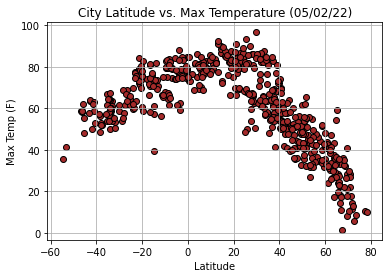

In [47]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "brown", edgecolor = "black")

plt.grid()

plt.title("City Latitude vs. Max Temperature (05/02/22)")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../output_files_LatvsTempplot")

plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression